# Artificial Neural Networks AM41AN

## Week 7 Cybenko's approximation

## Task 1

For a continuous function $f:[a,b]\to\mathbb{R}$, find the Cybenko approximation with $M$ terms:
$$
g_M(x)=f(a)+\sum_{i=1}^M\left[f(x_i)-f(x_{i-1})\right]\sigma\left(K(x-t_{i-1})\right),
$$
where
$$
x_i=a+i\frac{b-a}M\qquad\forall\,0\leq i\leq M,
$$
and $t_i=\frac{x_{i+1}+x_i}2$ for all $0\leq i<M$.
Consider different values of $0<K$ and different sigmoidal functions $\sigma$.

/tmp/ipykernel_15470/1818695377.py:13: RuntimeWarning: overflow encountered in exp
  return   1 / (1 + np.exp(-x))


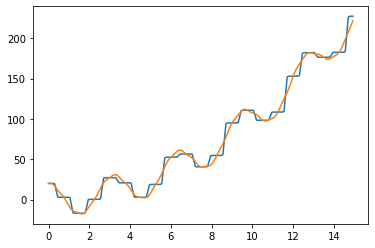

In [203]:
##############
### Task 1 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt  

def function(x):                                # Continuous function being approached
    return  np.sin(10 * x) + 20 * np.cos(2 * x) + x ** 2

def sig(x):                                     # Current sigmoidal function
#    return  (1 + np.sign(x)) / 2 
    return   1 / (1 + np.exp(-x))

def vectors(a,b,M):                            # Function that computs the grid points and mid-grid points
    xi = np.zeros(M + 1)                       # grid in x
    fi = np.zeros(M + 1)                       # grid in f(x)
    ti = np.zeros(M + 1)                       # mid-grid in x
    Dx = (b - a) / M                           # delta x
    for i in range(M):                         # calculation of each point
        xi[i] = a + i * Dx
        fi[i] = function(xi[i])
        ti[i] = a + (i + 0.5) * Dx
    xi[M] = b                                  # last point
    fi[M] = function(b)                        # last point
    return(xi,fi,ti)

def g(a,b,M,K,x,xj,fj,tj):                     # implementation of Cybenko's approximation in 1-d
    gg = fj[0]                                 # initial constant
    for i in range(1 , M + 1):                 # loop over the grid
        gg = gg + (fj[i] - fj[i - 1]) * sig(K * (x - tj[i-1]))
    return gg 

def approx(a,b,M,K,L):                         # uses Cybenko's approximation to compute the curve in [a,b]
    xx = np.arange(a,b,(b-a)/L)                # plotting grid on x
    aa = np.zeros(len(xx))                     # approximation to the curve
    bb = np.zeros(len(xx))                     # curve
    xv , fv , tv = vectors(a,b,M)              # computation of the grid parameters
    for i in range(len(xx)):                   # application of the approximation over all plotting grid points
        aa[i] = g(a,b,M,K,xx[i],xv,fv,tv)
        bb[i] = function(xx[i]) 
    plt.plot(xx,aa)                            # plots
    plt.plot(xx,bb)
    plt.show()
    
approx(0,15,20,50,200)


## Week 7 Error Back-Propagation

## Task 2

Implement the Error Back-Propagation (EBP) algorithm to train the weights of a network with one hidden layer compossed by $K$ sigmoidal units.
The task is to approximate a function $f:\mathscr{X}\subset\mathbb{R}\to\mathbb{R}$

In [204]:
##############
### Task 2 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt  
import random as rn

def function(x):                                # Continuous function being approached
    return  (np.sin(10 * x) + 20 * np.cos(2 * x) + x ** 2) / 600

def sig(x):                                     # Current sigmoidal function
#    return  (1 + np.sign(x)) / 2 
    return   1 / (1 + np.exp(-x))

def vectors(a,b,M):                            # Function that computs the grid points and mid-grid points
    xi = np.zeros(M + 1)                       # grid in x
    fi = np.zeros(M + 1)                       # grid in f(x)
    Dx = (b - a) / M                           # delta x
    for i in range(M):                         # calculation of each point
        xi[i] = a + i * Dx
        fi[i] = function(xi[i])
    xi[M] = b                                  # last point
    fi[M] = function(b)                        # last point
    return(xi,fi)

def network(X,W1,W2,q):                         # Computes the output of a network with one hidden layer. W1 connext the hidden units to
    s1 = np.shape(W1)                           # the inputs, Wz connects the outputs to the hidden units. Hidden units use sig 
    if s1[0] != 2:                              # Verifies that the weights are consistent with the dimension of the inputs and with
        print('error en w1')                    # themselves.
    s2 = len(W2)
    if s2 != s1[1] + 1:
        print('error en w2')
    z1 = np.zeros(s1[1] + 1)                    # hidden-units outputs
    for k in range(s1[1]):
        z1[k] = sig(q * (W1[0,k] * X + W1[1,k]))
    z1[s1[1]] = 1
    return(np.dot(z1,W2))                       # computs the output and returns it
    
def ebp(a,b,M,Q,K,eta,MaxIt,Epochs,logic,WW1,WW2):      # Computes the ebp algorithm to train a network with K sigmoidal units in its hidden layer
                                                # the network implements a map from [a,b] to R. The total number of points in the grid
                                                # is M, Q is the parameter for the sigmoidal's argument, MaxInt and Epochs control the
                                                # number of iterations and if logic = 1 creates from random values the networks'weights, if
                                                # logic != 1 then the program uses values for w1 and w2 computed in previous runs.
    emin = 10 ** 30                             # Initial value of the loss
    xx , ff = vectors(a,b,M)                    # Parameters of the grid
    plt.plot(xx,ff)
    plt.show()
    print('Finished vectors')
    if logic == 1:                              # Creates (or re-uses) the weights of the network
        w1 = np.random.normal(-1/np.sqrt(2),1/np.sqrt(2), size=(2,K)) / np.sqrt(K)    # Observe the initial conditions for the vectors.
        w2 = np.random.normal(-1/np.sqrt(K),1/np.sqrt(K), size=(K + 1))
    else:
        w1 = WW1
        w2 = WW2
        error = 0
        for ii in range(M):
            error = error + (ff[ii] - network(xx[ii],w1,w2,Q)) ** 2
        error = error / M
        if error < emin:                        # if the error is less than the error in the previous epoch the weights are accepted
            emin = error
            V1 = w1
            V2 = w2
    for ep in range(Epochs):                        # Outer loop in Epochs (sets the annealing to 1)
        for n in range(MaxIt):                      # Internal loop with annealing in the learning rate
            xeta = eta #/ np.sqrt(n + 1)
            z1 = np.zeros(K + 1)
            ii = rn.randint(0 , M - 1)
            for k in range(K):                  # Computes the outputs of the hidden units for the sellected point in the grid
                z1[k] = sig(Q * (w1[0,k] * xx[ii] + w1[1,k]))
            z1[K] = 1
            z2 = np.dot(w2,z1)                  # Computes the network's output
            del2 = (z2 -ff[ii])
            Dw2 = np.zeros(K + 1)
            Dw2 = del2 * z1
            Dw1 = np.zeros((2,K))
            for k in range(K):                  # computes the deltas for the hidden layer
                Dw1[1,k] = Q * z1[k] * (1 - z1[k]) * del2 * w2[k]
                Dw1[0,k] = Dw1[1,k] * xx[ii]
            for k in range(K):                  # implements the update of the weights w1 with annealed step
                 w1[:,k] = w1[:,k] - xeta * Dw1[:,k]
            w2 = w2 - xeta * Dw2                # implements the update of the weights w2 with annealed step
        error = 0                               # at the end of the internal loop computes the quadratic error over the grid
        for ii in range(M):
            error = error + (ff[ii] - network(xx[ii],w1,w2,Q)) ** 2
        error = error / M
        if error < emin:                        # if the error is less than the error in the previous epoch the weights are accepted
            emin = error
            V1 = w1
            V2 = w2
        else :                                  # if it isn't the weights are reset to the valius found in the previous epoch
            w1 = V1
            w2 = V2
        print(ep,'   ',emin)
    return(w1,w2)                               # outputs the trained network's weights


def approx(a,b,Q,L,wx1,wx2):                  
    xx = np.arange(a,b,(b-a)/L)                # plotting grid on x
    aa = np.zeros(len(xx))                     # approximation to the curve
    bb = np.zeros(len(xx))                     # curve
    for i in range(len(xx)):                   # application of the approximation over all plotting grid points
        aa[i] = network(xx[i],wx1,wx2,Q)
        bb[i] = function(xx[i]) 
    plt.plot(xx,aa)                            # plots
    plt.plot(xx,bb)
    plt.show()
    


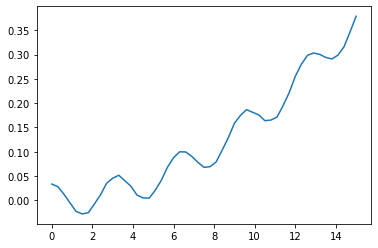

Finished vectors
0     0.001185456722711197
1     0.0007246284340585888
2     0.0007246284340585888
3     0.0006682096637826522
4     0.0006682096637826522
5     0.0006682096637826522
6     0.0006682096637826522
7     0.0005495510637363933
8     0.0005495510637363933
9     0.0005495510637363933
10     0.0005495510637363933
11     0.0005495510637363933
12     0.0005495510637363933
13     0.0005056564538665803
14     0.0005056564538665803
15     0.0005056564538665803
16     0.0004538641829557098
17     0.0004538641829557098
18     0.0004538641829557098
19     0.0004538641829557098
20     0.0004538641829557098
21     0.0004538641829557098
22     0.0004538641829557098
23     0.0004538641829557098
24     0.0004538641829557098
25     0.0004538641829557098
26     0.0004538641829557098
27     0.0004538641829557098
28     0.0004538641829557098
29     0.0004538641829557098
30     0.0004538641829557098
31     0.0004538641829557098
32     0.00044398359176057696
33     0.00044398359176057696
34    

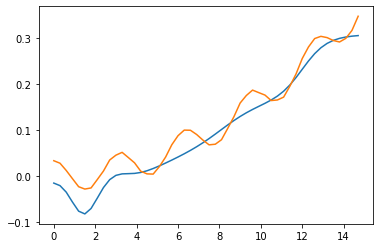

In [199]:
 yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

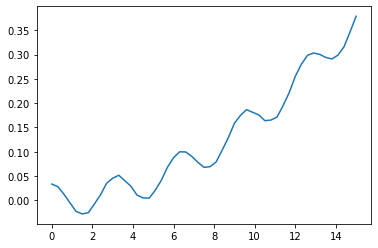

Finished vectors
0     0.0005041732919173425
1     0.0003392019774741691
2     0.0003392019774741691
3     0.0003392019774741691
4     0.0003392019774741691
5     0.0003172758739673536
6     0.0003164043232302589
7     0.0003164043232302589
8     0.0003164043232302589
9     0.0003164043232302589
10     0.0003164043232302589
11     0.0003164043232302589
12     0.0003164043232302589
13     0.0003164043232302589
14     0.0003164043232302589
15     0.0003164043232302589
16     0.0003164043232302589
17     0.0003164043232302589
18     0.0003164043232302589
19     0.0002838664072625777
20     0.0002838664072625777
21     0.0002838664072625777
22     0.0002838664072625777
23     0.0002838664072625777
24     0.0002838664072625777
25     0.0002838664072625777
26     0.0002838664072625777
27     0.0002838664072625777
28     0.0002838664072625777
29     0.0002838664072625777
30     0.0002838664072625777
31     0.0002838664072625777
32     0.0002838664072625777
33     0.00027043829447611945
34    

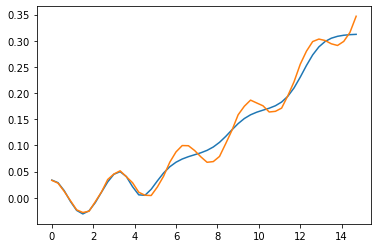

In [200]:
 yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

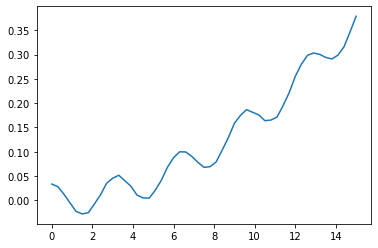

Finished vectors
0     0.00021558073284479388
1     0.00021558073284479388
2     0.00021558073284479388
3     0.00021558073284479388
4     0.00019619102586305336
5     0.00019619102586305336
6     0.00019619102586305336
7     0.00019619102586305336
8     0.00019005632489773892
9     0.00019005632489773892
10     0.00019005632489773892
11     0.00019005632489773892
12     0.00019005632489773892
13     0.00019005632489773892
14     0.00019005632489773892
15     0.00019005632489773892
16     0.00019005632489773892
17     0.00018339838870575726
18     0.00018339838870575726
19     0.00018339838870575726
20     0.00018339838870575726
21     0.00018339838870575726
22     0.00018339838870575726
23     0.00018339838870575726
24     0.000179578020485333
25     0.000179578020485333
26     0.000179578020485333
27     0.000179578020485333
28     0.000179578020485333
29     0.000179578020485333
30     0.000179578020485333
31     0.000179578020485333
32     0.000179578020485333
33     0.000179204112

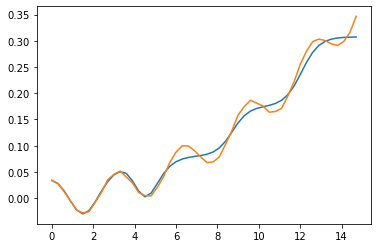

In [201]:
 yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

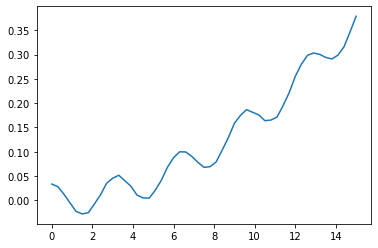

Finished vectors
0     0.00015884219975475432
1     0.00015884219975475432
2     0.00015673885795578757
3     0.00015673885795578757
4     0.00015673885795578757
5     0.00015313948347696132
6     0.00015313948347696132
7     0.00015313948347696132
8     0.00015313948347696132
9     0.00015313948347696132
10     0.00015313948347696132
11     0.00014981810174333595
12     0.00014981810174333595
13     0.00014678887391941328
14     0.00014678887391941328
15     0.00013883268796892743
16     0.00013883268796892743
17     0.00013883268796892743
18     0.00013883268796892743
19     0.00013883268796892743
20     0.00013883268796892743
21     0.00013883268796892743
22     0.00013883268796892743
23     0.00013883268796892743
24     0.00013883268796892743
25     0.00013883268796892743
26     0.00013883268796892743
27     0.00013883268796892743
28     0.00013883268796892743
29     0.00013883268796892743
30     0.00013883268796892743
31     0.00013883268796892743
32     0.00013883268796892743
33 

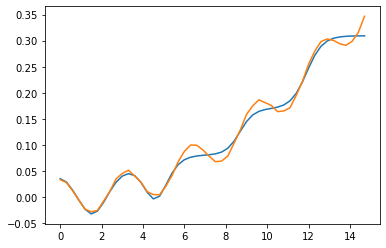

In [202]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

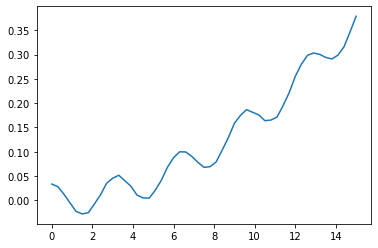

Finished vectors
0     0.00012447113810212313
1     0.00012447113810212313
2     0.00012447113810212313
3     0.00012447113810212313
4     0.00012447113810212313
5     0.00012447113810212313
6     0.00012447113810212313
7     0.00012447113810212313
8     0.00012447113810212313
9     0.00012447113810212313
10     0.00012447113810212313
11     0.00012447113810212313
12     0.00012447113810212313
13     0.00012447113810212313
14     0.00012447113810212313
15     0.00012447113810212313
16     0.00012447113810212313
17     0.00012447113810212313
18     0.00012447113810212313
19     0.00012447113810212313
20     0.00012447113810212313
21     0.00012225486528606014
22     0.00011971884577173595
23     0.00011971884577173595
24     0.00011971884577173595
25     0.00011971884577173595
26     0.0001168841993023907
27     0.0001168841993023907
28     0.0001168841993023907
29     0.0001168841993023907
30     0.0001168841993023907
31     0.0001168841993023907
32     0.0001168841993023907
33     0.0

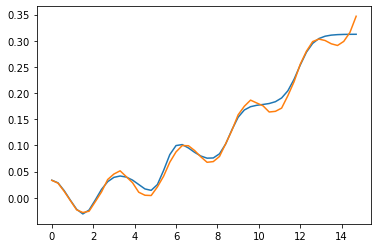

In [205]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

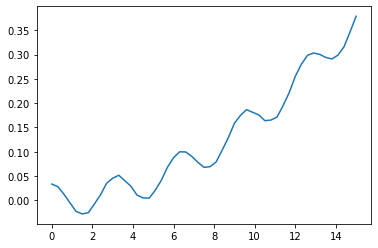

Finished vectors
0     9.751527387315849e-05
1     9.329864226016415e-05
2     9.329864226016415e-05
3     9.069322198280369e-05
4     8.709148577361726e-05
5     8.709148577361726e-05
6     8.709148577361726e-05
7     8.491852838123868e-05
8     8.491852838123868e-05
9     8.491852838123868e-05
10     8.262692716386385e-05
11     8.262692716386385e-05
12     8.262692716386385e-05
13     8.262692716386385e-05
14     8.262692716386385e-05
15     8.262692716386385e-05
16     8.262692716386385e-05
17     8.262692716386385e-05
18     8.262692716386385e-05
19     8.117738316708478e-05
20     8.117738316708478e-05
21     8.117738316708478e-05
22     8.117738316708478e-05
23     7.620080243683114e-05
24     7.620080243683114e-05
25     7.620080243683114e-05
26     7.620080243683114e-05
27     7.620080243683114e-05
28     7.620080243683114e-05
29     7.620080243683114e-05
30     7.620080243683114e-05
31     7.620080243683114e-05
32     7.620080243683114e-05
33     7.620080243683114e-05
34     

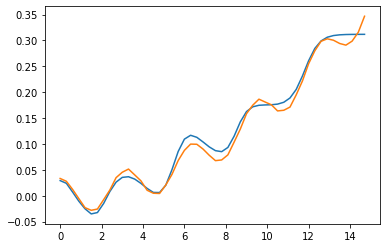

In [206]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

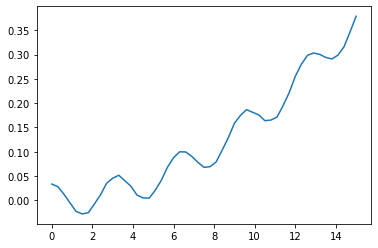

Finished vectors
0     9.29191923832534e-05
1     6.909445801994887e-05
2     6.909445801994887e-05
3     6.909445801994887e-05
4     6.909445801994887e-05
5     6.909445801994887e-05
6     6.909445801994887e-05
7     6.909445801994887e-05
8     6.909445801994887e-05
9     6.909445801994887e-05
10     6.909445801994887e-05
11     6.815117736122075e-05
12     6.815117736122075e-05
13     6.575108079881903e-05
14     6.575108079881903e-05
15     6.575108079881903e-05
16     6.556739523311428e-05
17     6.556739523311428e-05
18     6.556739523311428e-05
19     6.556739523311428e-05
20     6.556739523311428e-05
21     6.556739523311428e-05
22     6.556739523311428e-05
23     6.556739523311428e-05
24     6.556739523311428e-05
25     6.556739523311428e-05
26     6.556739523311428e-05
27     6.556739523311428e-05
28     6.556739523311428e-05
29     6.556739523311428e-05
30     6.556739523311428e-05
31     6.556739523311428e-05
32     6.556739523311428e-05
33     6.556739523311428e-05
34     6

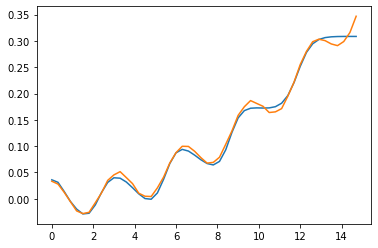

In [207]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

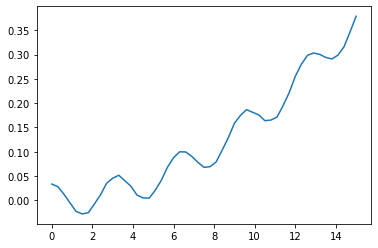

Finished vectors
0     6.325294583838084e-05
1     6.325294583838084e-05
2     6.325294583838084e-05
3     6.325294583838084e-05
4     6.325294583838084e-05
5     6.325294583838084e-05
6     6.325294583838084e-05
7     6.325294583838084e-05
8     6.325294583838084e-05
9     6.325294583838084e-05
10     6.325294583838084e-05
11     6.325294583838084e-05
12     6.325294583838084e-05
13     6.325294583838084e-05
14     6.325294583838084e-05
15     6.325294583838084e-05
16     6.325294583838084e-05
17     6.325294583838084e-05
18     6.325294583838084e-05
19     6.325294583838084e-05
20     6.325294583838084e-05
21     6.325294583838084e-05
22     6.325294583838084e-05
23     6.325294583838084e-05
24     6.325294583838084e-05
25     6.325294583838084e-05
26     6.325294583838084e-05
27     6.325294583838084e-05
28     6.325294583838084e-05
29     6.325294583838084e-05
30     6.219942159234665e-05
31     6.219942159234665e-05
32     6.219942159234665e-05
33     6.219942159234665e-05
34     

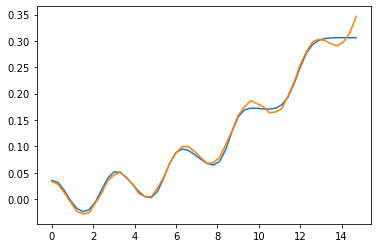

In [208]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

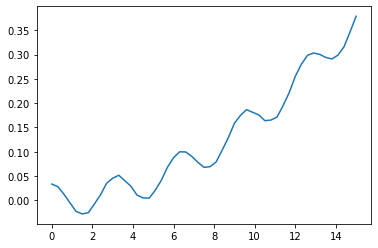

Finished vectors
0     6.668468023083081e-05
1     6.247127961702095e-05
2     6.247127961702095e-05
3     6.247127961702095e-05
4     6.247127961702095e-05
5     6.247127961702095e-05
6     6.247127961702095e-05
7     6.247127961702095e-05
8     5.86459716034335e-05
9     5.86459716034335e-05
10     5.86459716034335e-05
11     5.86459716034335e-05
12     5.86459716034335e-05
13     5.86459716034335e-05
14     5.86459716034335e-05
15     5.86459716034335e-05
16     5.86459716034335e-05
17     5.86459716034335e-05
18     5.86459716034335e-05
19     5.86459716034335e-05
20     5.86459716034335e-05
21     5.86459716034335e-05
22     5.86459716034335e-05
23     5.86459716034335e-05
24     5.86459716034335e-05
25     5.86459716034335e-05
26     5.86459716034335e-05
27     5.86459716034335e-05
28     5.86459716034335e-05
29     5.86459716034335e-05
30     5.86459716034335e-05
31     5.86459716034335e-05
32     5.86459716034335e-05
33     5.86459716034335e-05
34     5.617490235316635e-05
35  

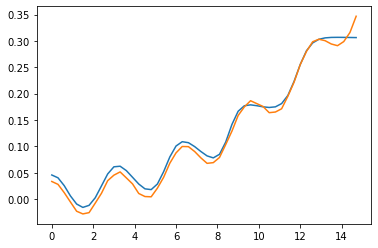

In [209]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)

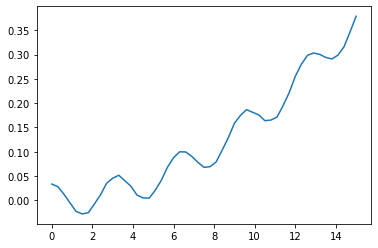

Finished vectors
0     0.00012348969032376954
1     0.00012348969032376954
2     6.025472091216009e-05
3     6.025472091216009e-05
4     6.025472091216009e-05
5     5.9583729636517677e-05
6     5.9583729636517677e-05
7     5.9583729636517677e-05
8     5.9583729636517677e-05
9     5.9583729636517677e-05
10     5.9583729636517677e-05
11     5.9583729636517677e-05
12     5.9583729636517677e-05
13     5.9583729636517677e-05
14     5.9583729636517677e-05
15     5.9583729636517677e-05
16     5.9583729636517677e-05
17     5.9583729636517677e-05
18     5.9583729636517677e-05
19     5.9583729636517677e-05
20     5.584471112674339e-05
21     5.584471112674339e-05
22     5.584471112674339e-05
23     5.584471112674339e-05
24     5.584471112674339e-05
25     5.584471112674339e-05
26     5.584471112674339e-05
27     5.584471112674339e-05
28     5.584471112674339e-05
29     5.584471112674339e-05
30     5.584471112674339e-05
31     5.584471112674339e-05
32     5.584471112674339e-05
33     5.5844711126

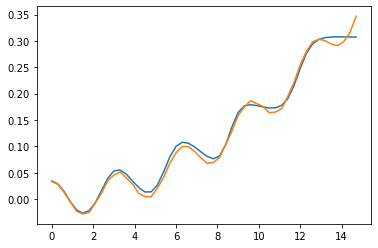

In [210]:
yy1,yy2 = ebp(0,15,50,5,20,.2,5000,100,-1,yy1,yy2)
approx(0,15,5,50,yy1,yy2)